Student: Denny Boechat.

Course: Advanced Big Data and Data Mining (MSCS-634-B01).

Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

In [5]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [4]:
print("Features amount:", df.shape[1])
print("Features:", df.columns.tolist())

Features amount: 14
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']


In [6]:
# Standardize the dataset using z-score normalization to ensure consistent scaling across features

from sklearn.preprocessing import StandardScaler

feature_cols = wine.feature_names
X = df[feature_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=feature_cols)
df_scaled['target'] = df['target']
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


In [7]:
# K-Means algorithm with k = 3

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

feature_cols = wine.feature_names
X = df_scaled[feature_cols].values

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

df_scaled['cluster'] = clusters
centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_cols)
print("Cluster centers (z‑score normalized features):")
display(centers)

print("Confusion matrix (true target × cluster label):")
print(confusion_matrix(df_scaled['target'], df_scaled['cluster']))

print("\nClassification report treating clusters as predicted labels:")
print(classification_report(df_scaled['target'], df_scaled['cluster']))


Cluster centers (z‑score normalized features):


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185


Confusion matrix (true target × cluster label):
[[ 0  0 59]
 [65  3  3]
 [ 0 48  0]]

Classification report treating clusters as predicted labels:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.06      0.04      0.05        71
           2       0.00      0.00      0.00        48

    accuracy                           0.02       178
   macro avg       0.02      0.01      0.02       178
weighted avg       0.02      0.02      0.02       178



In [12]:
# Train the model and obtain the cluster labels

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df['cluster'] = cluster_labels
print(df['cluster'].value_counts())


cluster
0    65
2    62
1    51
Name: count, dtype: int64


In [13]:
# Silhouette Score

from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.285


In [14]:
# Adjusted Rand Index (ARI)

from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df['target'], df['cluster'])
print(f"Adjusted Rand Index: {ari:.3f}")

Adjusted Rand Index: 0.897


In [20]:
# K-Medoids algorithm with k = 3

from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam')
labels_kmedoids = kmedoids.fit_predict(X_scaled)

df['kmedoids_cluster'] = labels_kmedoids
print(df['kmedoids_cluster'].value_counts())

print("\nMedoid sample indices:", kmedoids.medoid_indices_)

K‑Medoids cluster distribution:
kmedoids_cluster
2    74
1    55
0    49
Name: count, dtype: int64

Medoid sample indices: [148 106  35]


In [22]:
# Silhouette Score 

from sklearn.metrics import silhouette_score

sil_score_kmedoids = silhouette_score(X_scaled, df['kmedoids_cluster'])
print(f"Silhouette Score for K‑Medoids: {sil_score_kmedoids:.3f}")

Silhouette Score for K‑Medoids: 0.268


In [23]:
# Adjusted Rand Index (ARI)

from sklearn.metrics import adjusted_rand_score

ari_kmedoids = adjusted_rand_score(df['target'], df['kmedoids_cluster'])
print(f"Adjusted Rand Index for K‑Medoids: {ari_kmedoids:.3f}")


Adjusted Rand Index for K‑Medoids: 0.741


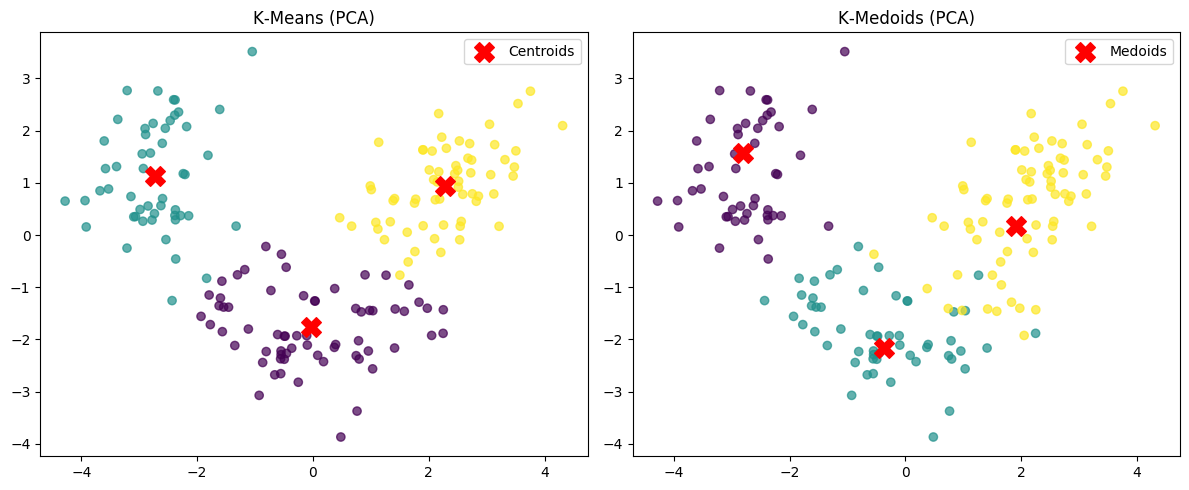

In [28]:
# side-by-side scatter plots for both the K-Means and K-Medoids clusters

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

centers_pca = pca.transform(kmeans.cluster_centers_)
medoids = X_scaled[kmedoids.medoid_indices_]
medoids_pca = pca.transform(medoids)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], alpha=0.7)
axes[0].scatter(centers_pca[:,0], centers_pca[:,1], marker='X', s=200, c='red', label='Centroids')
axes[0].set_title('K‑Means (PCA)'); axes[0].legend()

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=df['kmedoids_cluster'], alpha=0.7)
axes[1].scatter(medoids_pca[:,0], medoids_pca[:,1], marker='X', s=200, c='red', label='Medoids')
axes[1].set_title('K‑Medoids (PCA)'); axes[1].legend()

plt.tight_layout()
plt.show()